In [ ]:
%matplotlib inline
import pandas as pd
import plotly
import os

In [4]:
gt = pd.read_csv('../Groundtruth/Groundtruth.csv')
cols = [col for col in gt.columns if 'UP' in col or 'DOWN' in col]
results = gt.groupby('Difficulty')[cols].sum().reindex(['E', 'M', 'H', 'X'])

print(results)

            UP  DOWN
Difficulty          
E           25    21
M           29    21
H           92   108
X            4     9


In [22]:
folder = '../Analysis/Cropped_all/'

for filename in os.listdir(folder):
    data = pd.read_csv(folder + filename)
    df = pd.merge(gt, data, on='File', suffixes=('_GT', '_' + filename))
    cols = [col for col in df.columns if 'UP' in col or 'DOWN' in col]
    print('Average fps ' + filename, df['FPS'].mean())
    results['UP_' + filename] = df.groupby('Difficulty')[cols].sum()['UP_' + filename]
    results['DOWN_' + filename] = df.groupby('Difficulty')[cols].sum()['DOWN_' + filename]
    results['RESULT_' + filename] = 1-round(abs((results['UP_' + filename] + results['DOWN_' + filename]) - (results['UP'] + results['DOWN'])) /
                                          (results['UP'] + results['DOWN']), 2)
print(results)

Average fps Yolo.csv 27.414375161105628
Average fps haar_upper.csv 59.218481514130396
Average fps hog_slow.csv 33.893849568988195
Average fps MobileNet.csv 29.247464123454172
Average fps haar_full.csv 86.11032142809493
Average fps hog_fast.csv 63.54468063448681
            UP  DOWN  UP_Yolo.csv  DOWN_Yolo.csv  RESULT_Yolo.csv  \
Difficulty                                                          
E           25    21           23             21             0.96   
M           29    21           17             17             0.68   
H           92   108           49             80             0.64   
X            4     9            2              5             0.54   

            UP_haar_upper.csv  DOWN_haar_upper.csv  RESULT_haar_upper.csv  \
Difficulty                                                                  
E                          16                   13                   0.63   
M                           6                    8                   0.28   
H              

In [23]:
cols = [col for col in results.columns if 'RESULT' in col]
analysis = results[cols]
print(analysis)

            RESULT_Yolo.csv  RESULT_haar_upper.csv  RESULT_hog_slow.csv  \
Difficulty                                                                
E                      0.96                   0.63                 0.50   
M                      0.68                   0.28                 0.34   
H                      0.64                   0.16                 0.26   
X                      0.54                   0.15                 0.15   

            RESULT_MobileNet.csv  RESULT_haar_full.csv  RESULT_hog_fast.csv  
Difficulty                                                                   
E                           0.93                  0.28                  0.0  
M                           0.80                  0.14                  0.0  
H                           0.66                  0.07                  0.0  
X                           0.69                  0.15                  0.0  


In [24]:
print(analysis['RESULT_Yolo.csv'])

Difficulty
E    0.96
M    0.68
H    0.64
X    0.54
Name: RESULT_Yolo.csv, dtype: float64


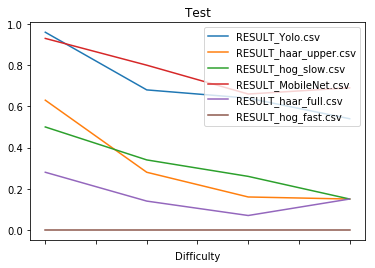

In [26]:
analysis.plot(title='Test')

In [6]:
folder = '../Analysis/Cropped_all/'

for filename in os.listdir(folder):
    data = pd.read_csv(folder + filename)
    df = pd.merge(gt, data, on='File', suffixes=('_GT', '_' + filename))
print(df)

                File  UP_GT  DOWN_GT Difficulty  UP_MobileNet.csv  \
0   00:00:30.442.mp4      1        0          E                 1   
1   00:00:40.515.mp4      0        1          E                 0   
2   00:00:44.976.mp4      1        0          E                 1   
3   00:00:54.431.mp4      0        1          E                 0   
4   00:01:06.501.mp4      1        0          E                 1   
5   00:01:08.637.mp4      1        0          E                 1   
6   00:01:18.633.mp4      0        1          E                 0   
7   00:01:18.718.mp4      0        1          E                 0   
8   00:01:33.260.mp4      1        0          E                 1   
9   00:01:35.018.mp4      1        0          E                 1   
10  00:01:43.464.mp4      0        1          E                 0   
11  00:01:46.723.mp4      0        1          E                 0   
12  00:01:56.787.mp4      1        0          E                 1   
13  00:02:06.019.mp4      0       